In [1]:
'''
Given the e-commerce data in cust_data.xlsx, use k-means clustering algorithm to cluster customers with similar interest.
'''

'\nGiven the e-commerce data in cust_data.xlsx, use k-means clustering algorithm to cluster customers with similar interest.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
from sklearn.cluster import KMeans
wccs = []
for i in range(1,30):
    km = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300, random_state = 1)
    km.fit(x)
    wccs.append(km.inertia_)

In [8]:
wccs

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25002.361699994155,
 21829.13563877983,
 20035.13778397607,
 17860.918734043735,
 16153.173029286314,
 14271.67028265852,
 13218.79278709796,
 11925.536165794989,
 10979.62758563276,
 9903.609931160794,
 9299.722157744216,
 8725.925612605786,
 8272.360357355064,
 7772.761631351105,
 7454.045741758242,
 6949.624460811992,
 6521.023618353798,
 6151.0226589423655,
 5828.8900413596075,
 5481.831189977071,
 5271.179797979798,
 5029.2925940073]

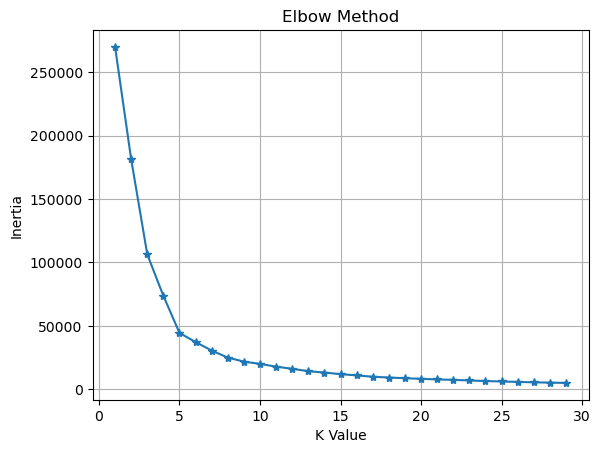

In [9]:
plt.plot(range(1,30), wccs, marker = "*")
plt.title("Elbow Method")
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [11]:
km1 = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, max_iter = 300, random_state = 1)
labels = km1.fit_predict(x)

In [12]:
km1.inertia_

44448.45544793371

In [15]:
km1.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [13]:
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [16]:
df["c_labels"] = labels

In [17]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),c_labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [18]:
centroid_df = pd.DataFrame(km1.cluster_centers_, columns = ["X","Y"])
centroid_df

,X,Y
0,55.296296,49.518519
1,88.200000,17.114286
2,25.727273,79.363636
3,86.538462,82.128205
4,26.304348,20.913043


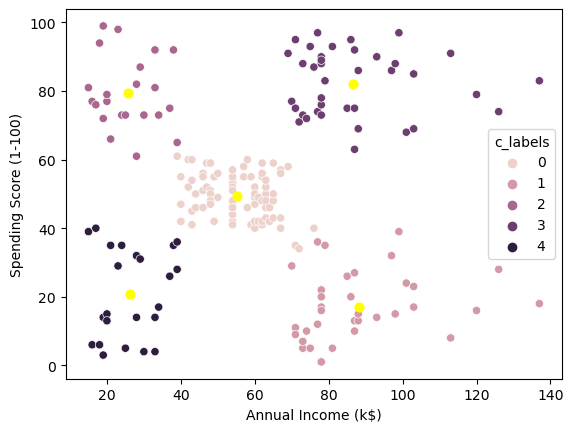

In [21]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "c_labels")
plt.scatter(centroid_df["X"], centroid_df["Y"], s = 40, color = "yellow")
plt.show()